# Model Selection and Classification Exercise

In [1]:
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Bank Marketing Data Set

* The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

* More information please visit: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing


### Attribute Information:

### Bank client data:
* `age` (numeric)
* `job` : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* `marital` : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* `education` (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* `default`: has credit in default? (categorical: 'no','yes','unknown')
* `housing`: has housing loan? (categorical: 'no','yes','unknown')
* `loan`: has personal loan? (categorical: 'no','yes','unknown')

### Related with the last contact of the current campaign:
* `contact`: contact communication type (categorical: 'cellular','telephone') 
* `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* `day_of_week`: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

### Other attributes:
* `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* `previous`: number of contacts performed before this campaign and for this client (numeric)
* `poutcome`: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

### Social and economic context attributes
* `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
* `cons.price.idx`: consumer price index - monthly indicator (numeric) 
* `cons.conf.idx`: consumer confidence index - monthly indicator (numeric) 
* `euribor3m`: euribor 3 month rate - daily indicator (numeric)
* `nr.employed`: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
* `y` - has the client subscribed a term deposit? (binary: 'yes','no')

## Problem Statement

### You are assigned to build a classification model to predict a probability that a client will subscribe a term deposit so that the company can target the right clients.

### Implement model selection; candidate models are Logistic Regression and Decision Tree; 
### Use 'roc_auc' as evaluation metric: https://stats.stackexchange.com/questions/132777/what-does-auc-stand-for-and-what-is-it

In [2]:
import pandas as pd

df = pd.read_csv('bank/bank-additional-full.csv')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Data Exploration

In [3]:
df.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

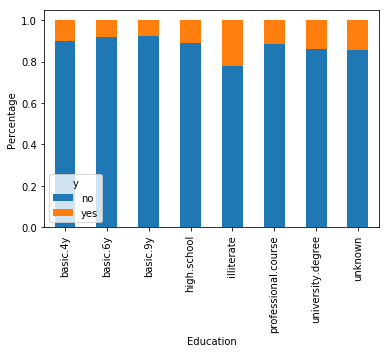

In [4]:
education_y = pd.crosstab(df.education, df.y)
education_y.div(education_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Percentage')

In [5]:
"""
DO SOME DATA EXPLORATION
"""
import numpy as np
df['new_y'] = np.where(df['y'] == 'yes', 1, 0)
corr = df.corr()
# sns.heatmap(corr, 
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values,
#             cmap='RdBu_r')
df.corr()['new_y']

age               0.030399
campaign         -0.066357
pdays            -0.324914
previous          0.230181
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
new_y             1.000000
Name: new_y, dtype: float64

In [6]:
df.drop('new_y', axis=1, inplace=True)

## Data Pre-Processing

In [7]:
from sklearn.preprocessing import LabelEncoder

y = df.y.values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['no', 'yes'], dtype=object)

In [8]:
"""
PREPROCESS YOUR X
"""
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
features = list(df.columns.values)
features.remove('y')
cat_features = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week"
               ,"pdays", "poutcome"]
df_2 = df[features]
X = pd.get_dummies(df_2, columns=cat_features, drop_first=True)

In [10]:
# Baseline
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     stratify=y,
                     random_state=1)
# Decision Tree
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)

# Logistic
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

# Evalutation
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
y_proba_dt = dt.predict_proba(X_test)[:, 1]
y_proba_lg = lg.predict_proba(X_test)[:, 1]
y_proba_rf = rf.predict_proba(X_test)[:, 1]

print('DT: AUC Score: %.3f' % roc_auc_score(y_true=y_test, y_score=y_proba_dt))
print('LG: AUC Score: %.3f' % roc_auc_score(y_true=y_test, y_score=y_proba_lg))
print('RF: AUC Score: %.3f' % roc_auc_score(y_true=y_test, y_score=y_proba_rf))

DT: AUC Score: 0.641
LG: AUC Score: 0.789
RF: AUC Score: 0.776


In [11]:
# Feature Selection
# print(dt.feature_importances_)
# print(rf.feature_importances_)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")
new_features = []
for f in range(X.shape[1]):
    if importances[indices[f]] != 0:
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
        new_features.append(indices[f])
    
# print(X.head())
# len(list(X.columns.values))
# X = X.ix[:, new_features]
# new_features
X = X.ix[:, new_features]

1. feature 76 (0.146035)
2. feature 43 (0.114160)
3. feature 3 (0.111802)
4. feature 2 (0.108586)
5. feature 74 (0.107019)
6. feature 51 (0.086638)
7. feature 6 (0.083654)
8. feature 75 (0.080767)
9. feature 4 (0.052442)
10. feature 12 (0.035366)
11. feature 5 (0.021733)
12. feature 44 (0.018577)
13. feature 58 (0.013080)
14. feature 36 (0.010715)
15. feature 41 (0.005766)
16. feature 20 (0.002656)
17. feature 54 (0.000721)
18. feature 26 (0.000282)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:21: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


# Model Selection

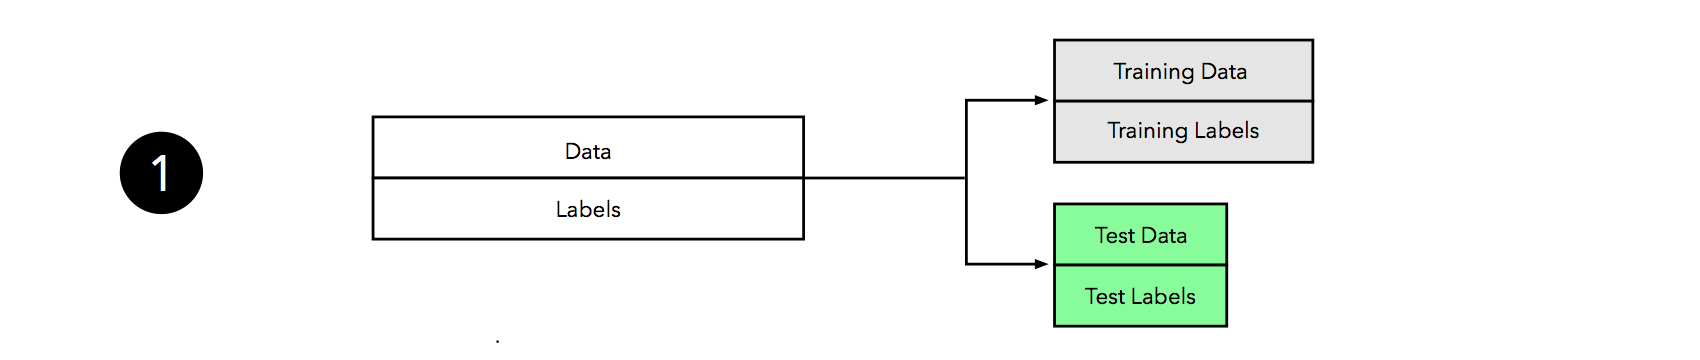

In [12]:
Image(filename='images/ms_1.png', width=1000) 

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.2,
                     stratify=y,
                     random_state=1)

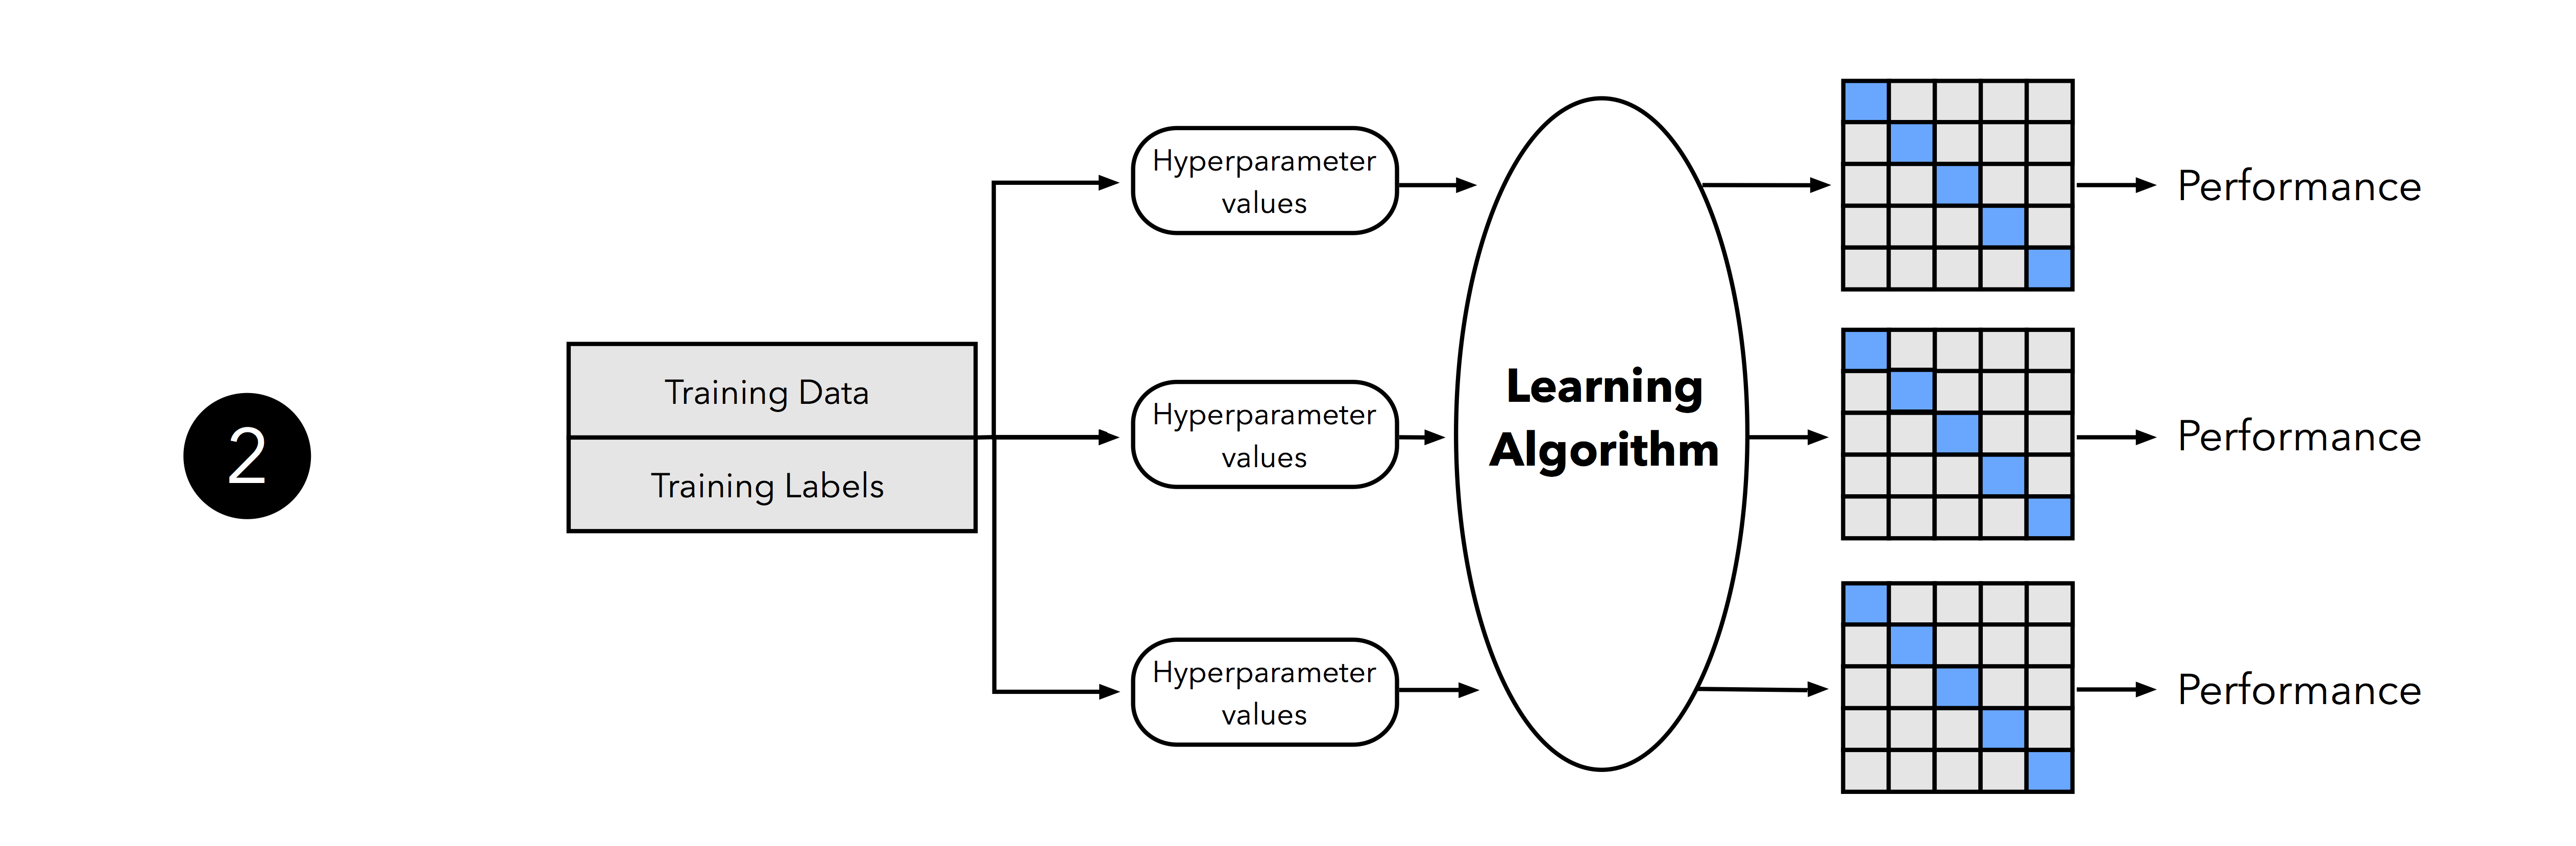

In [14]:
Image(filename='images/ms_2.png', width=1000) 

In [15]:
"""
DO HYPER-PARAMETER SEARCH
"""
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(),
                        LogisticRegression(random_state=1))

param_grid_lr = [{'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]}]

gs_lr = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid_lr, 
                  scoring='accuracy', 
                  cv=10,
                  refit=True)

gs_lr = gs_lr.fit(X_train, y_train)

print(gs_lr.best_score_)
print(gs_lr.best_params_)

pipe_dt = make_pipeline(DecisionTreeClassifier(random_state=1))

param_grid_dt = [{'decisiontreeclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, None], 
               'decisiontreeclassifier__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}]

gs_dt = GridSearchCV(estimator=pipe_dt,
                  param_grid=param_grid_dt,
                  scoring='accuracy',
                  cv=10,
                  refit=True)

gs_dt = gs_dt.fit(X_train, y_train)

print(gs_dt.best_score_)
print(gs_dt.best_params_)

0.898937784522
{'logisticregression__C': 0.01}
0.9
{'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__min_samples_leaf': 2}


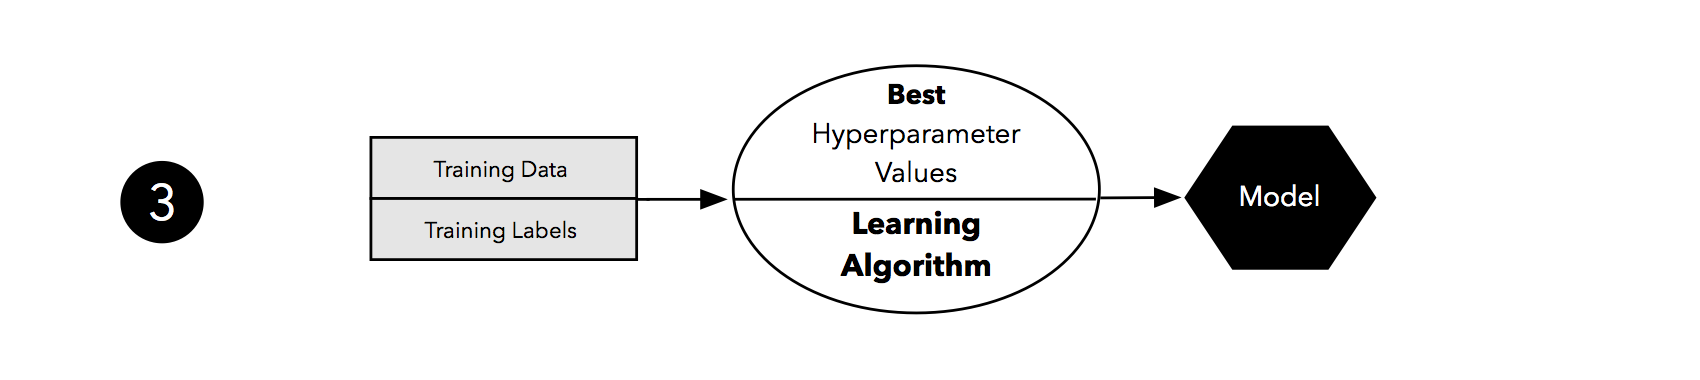

In [16]:
Image(filename='images/ms_3.png', width=1000)

In [17]:
"""
SELECT BEST ESTIMATOR IN EACH ALGORITHM
"""
#select best estimator for each algorithm
best_lr = gs_lr.best_estimator_
best_dt = gs_dt.best_estimator_

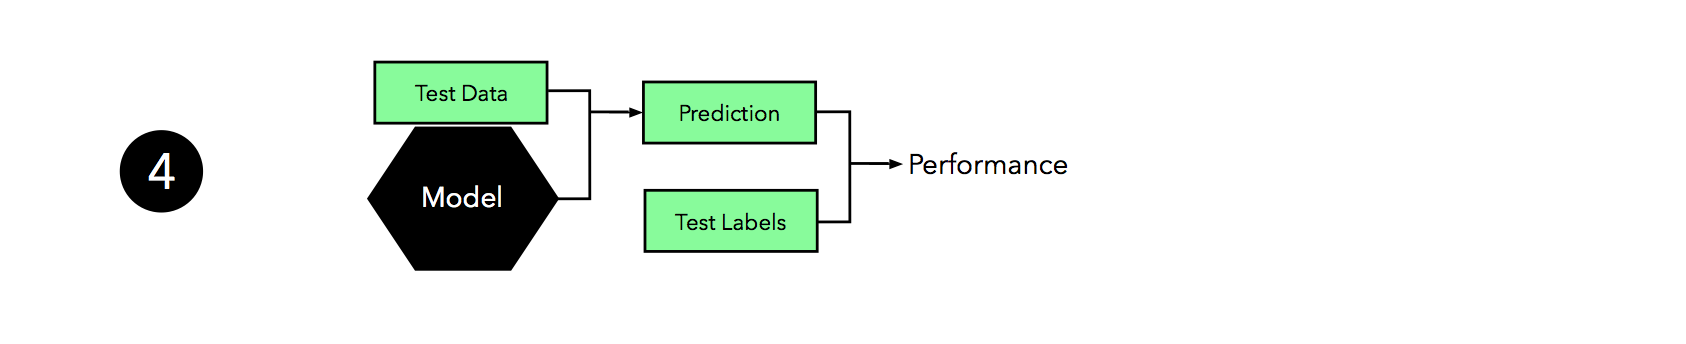

In [18]:
Image(filename='images/ms_4.png', width=1000) 

In [19]:
"""
EVALUATE YOUR MODEL ON TEST DATA
AND PICK YOUR BEST MODEL
"""
from sklearn.metrics import accuracy_score

y_pred_lr_test = best_lr.predict(X_test)
y_pred_dt_test = best_dt.predict(X_test)

y_pred_lr_train = best_lr.predict(X_train)
y_pred_dt_train = best_dt.predict(X_train)

print("Training Error")
print('Logistic Regression Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_lr_train))
print('Decision Tree Train Accuracy: %.3f' % accuracy_score(y_true=y_train, y_pred=y_pred_dt_train))
print("---------------")
print("Testing Error")
print('Logistic Regression Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_lr_test))
print('Decision Tree Test Accuracy: %.3f' % accuracy_score(y_true=y_test, y_pred=y_pred_dt_test))

Training Error
Logistic Regression Train Accuracy: 0.899
Decision Tree Train Accuracy: 0.902
---------------
Testing Error
Logistic Regression Test Accuracy: 0.900
Decision Tree Test Accuracy: 0.900


## Calculate ROC_AUC Score

In [20]:
from sklearn.metrics import roc_auc_score

"""
GET Y_PROBA
"""
y_proba = best_lr.predict_proba(X_test)[:, 1]
print('AUC Score: %.3f' % roc_auc_score(y_true=y_test, y_score=y_proba))

AUC Score: 0.782


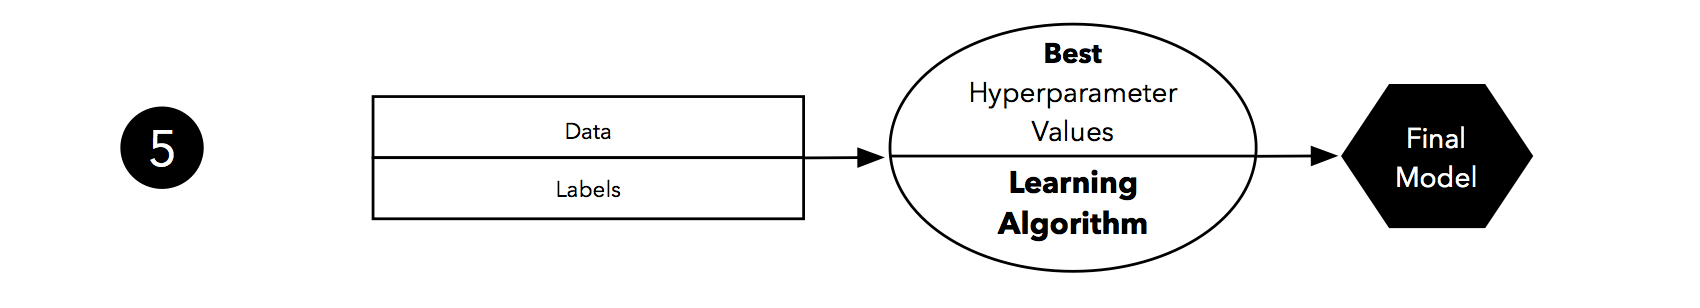

In [21]:
Image(filename='images/ms_5.png', width=1000) 

In [22]:
"""
FIT MODEL ON THE ENTIRE DATA SET
"""
final_model = best_lr.fit(X, y)
print(final_model)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('logisticregression', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_...nalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])
